<ipython-input-18-f03a85f9481f>:22: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


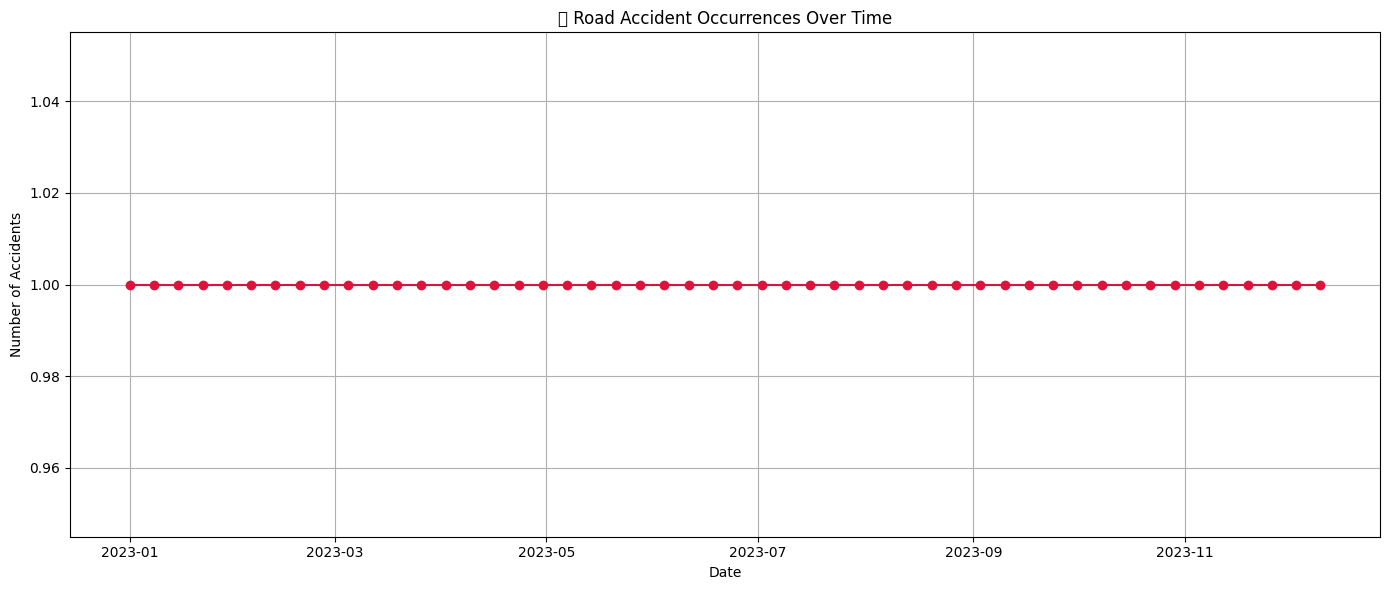

In [18]:
# import pandas as pd
# Load the dataset
road_df = pd.read_excel ('/content/Road_Accident_Fatalities.xlsx')
# Convert 'Date' column to datetime format
road_df['Date'] = pd.to_datetime(road_df['Date'], errors='coerce')

# Group by date and count the number of accidents per day
accident_trend = road_df.groupby('Date').size().reset_index(name='Accident Count')

# Sort by date
accident_trend = accident_trend.sort_values('Date')

# Plot a line chart to show fluctuation of accident occurrences over time
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(accident_trend['Date'], accident_trend['Accident Count'], marker='o', linestyle='-', color='crimson')
plt.title('📈 Road Accident Occurrences Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-21-639b586fb537>:18: UserWarning: Glyph 127782 (\N{WHITE SUN BEHIND CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127782 (\N{WHITE SUN BEHIND CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


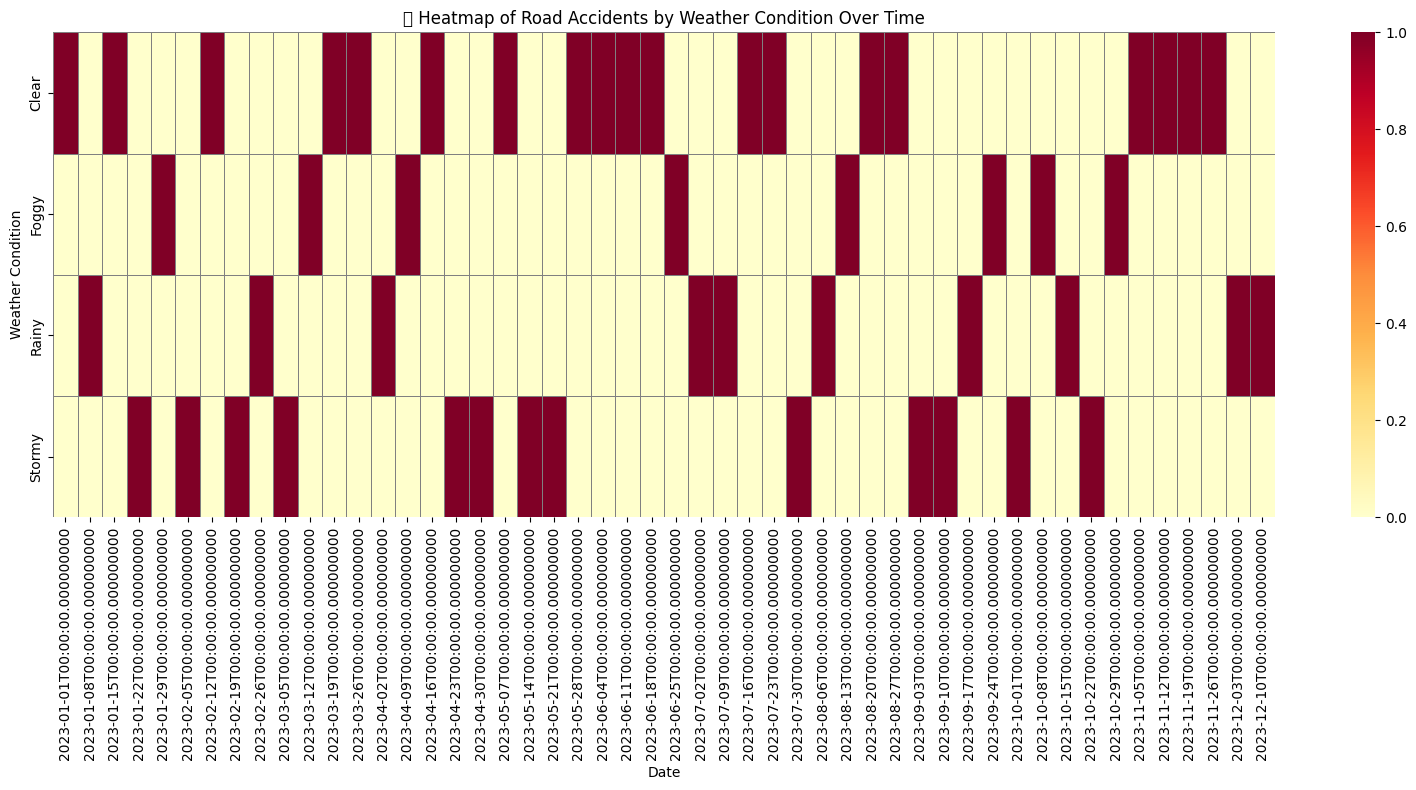

In [21]:
import seaborn as sns # Import the seaborn library and give it the alias 'sns'

# Use the correct column: 'Weather Condition'
road_df['Weather Condition'] = road_df['Weather Condition'].fillna('Unknown')

# Group by Date and Weather Condition to count accidents
weather_daily = road_df.groupby(['Date', 'Weather Condition']).size().reset_index(name='Accident Count')

# Pivot table for heatmap: Rows = Weather Condition, Columns = Date, Values = Accident Count
weather_pivot = weather_daily.pivot(index='Weather Condition', columns='Date', values='Accident Count').fillna(0)

# Create heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(weather_pivot, cmap='YlOrRd', linewidths=0.5, linecolor='gray') # Now 'sns' is defined and can be used
plt.title('🌦️ Heatmap of Road Accidents by Weather Condition Over Time')
plt.xlabel('Date')
plt.ylabel('Weather Condition')
plt.tight_layout()
plt.show()

<ipython-input-22-d8878ec2ff12>:26: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-22-d8878ec2ff12>:26: UserWarning: Glyph 129686 (\N{MILITARY HELMET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129686 (\N{MILITARY HELMET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


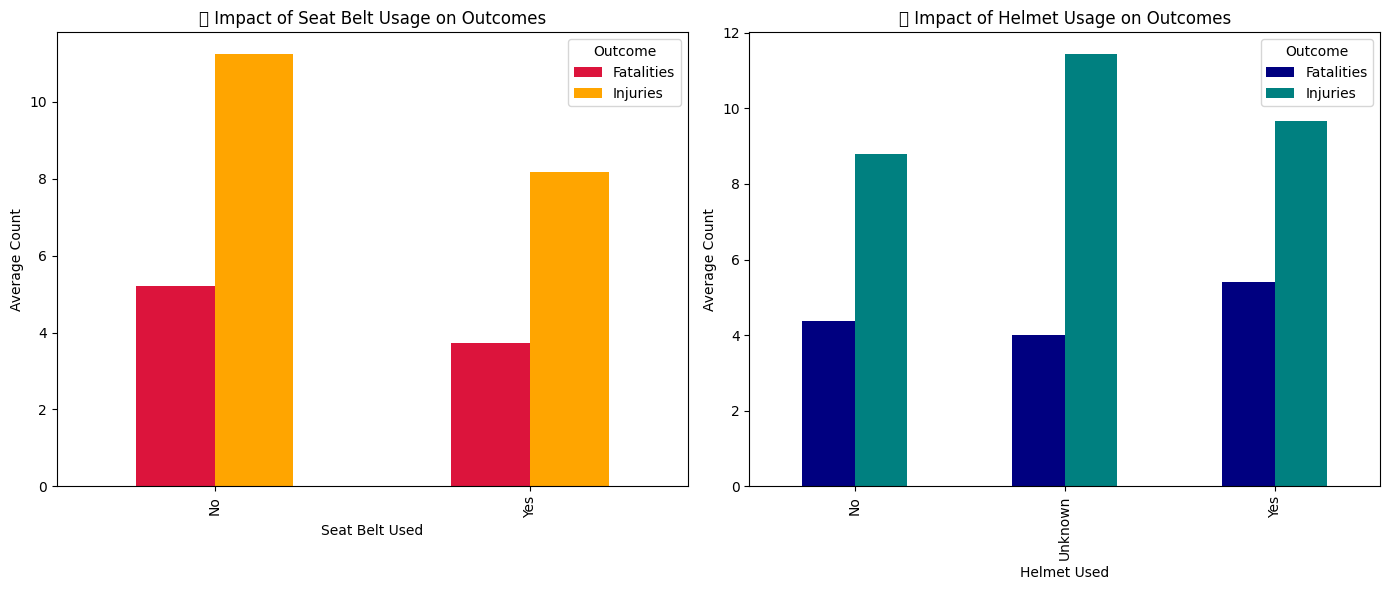

In [22]:
# Clean missing values for Seat Belt and Helmet usage
road_df['Seat Belt Used'] = road_df['Seat Belt Used'].fillna('Unknown')
road_df['Helmet Used'] = road_df['Helmet Used'].fillna('Unknown')

# Group by usage and compute average outcomes
seatbelt_impact = road_df.groupby('Seat Belt Used')[['Fatalities', 'Injuries']].mean().round(2)
helmet_impact = road_df.groupby('Helmet Used')[['Fatalities', 'Injuries']].mean().round(2)

# Plot side-by-side bar charts for comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Seat Belt Usage Impact
seatbelt_impact.plot(kind='bar', ax=axes[0], color=['crimson', 'orange'])
axes[0].set_title('🎯 Impact of Seat Belt Usage on Outcomes')
axes[0].set_ylabel('Average Count')
axes[0].set_xlabel('Seat Belt Used')
axes[0].legend(title='Outcome')

# Helmet Usage Impact
helmet_impact.plot(kind='bar', ax=axes[1], color=['navy', 'teal'])
axes[1].set_title('🪖 Impact of Helmet Usage on Outcomes')
axes[1].set_ylabel('Average Count')
axes[1].set_xlabel('Helmet Used')
axes[1].legend(title='Outcome')

plt.tight_layout()
plt.show()


In [24]:
!pip install plotly.express
import plotly.express as px # Import the plotly.express module and assign it to the alias 'px'

# Clean missing values
road_df['Speeding'] = road_df['Speeding'].fillna('Unknown')

# Group by Road Type and Speeding status
fatality_summary = road_df.groupby(['Road Type', 'Speeding'])['Fatalities'].sum().reset_index()

# Create Treemap
fig = px.treemap( # Now 'px' is defined and can be used to create the treemap
    fatality_summary,
    path=['Road Type', 'Speeding'],
    values='Fatalities',
    color='Fatalities',
    color_continuous_scale='Reds',
    title='🌳 Treemap of Fatalities by Road Type and Speeding Status'
)
fig.update_traces(textinfo='label+value')
fig.show()